In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import time

In [2]:
os.chdir('C:\\Users\\PPPP\\Desktop\\DA RW_Project\\Project4 SalesAnalysis\\Sales_Data')

# Preparing Data for Analysis

In [3]:
# combine all  the differents  data in one Dataframe csv  file 
files=[file for file in os.listdir('C:\\Users\\PPPP\\Desktop\\DA RW_Project\\Project4 SalesAnalysis\\Sales_Data')]
path='C:\\Users\\PPPP\\Desktop\\DA RW_Project\\Project4 SalesAnalysis\\Sales_Data'
all_data=pd.DataFrame()
for file in files:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
    
all_data.shape

(186495, 6)

In [4]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
#drop all the null missing values
all_data=all_data.dropna(how='all')
all_data.shape

(185950, 6)

In [6]:
# the Best Month of sale 
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
all_data.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [8]:
# splitting the orderDAte into data and time 
'04/19/19 08:46'.split(' ')[1]

'08:46'

In [9]:
def timeorder(x):
    return x.split(' ')[1]

In [10]:
all_data['order Time']=all_data['Order Date'].apply(timeorder)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order Time
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",8:46
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",22:30
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",9:27


In [11]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [12]:
def orderDate(x):
    return x.split(' ')[0]

In [13]:
all_data['Order_Date']=all_data['Order Date'].apply(orderDate)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order Time,Order_Date
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",8:46,4/19/2019
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",22:30,4/7/2019
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",9:27,4/30/2019


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order Time,Order_Date
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",8:46,4/19/2019
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",22:30,4/7/2019
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",9:27,4/30/2019


In [15]:
all_data=all_data.drop(columns=['Order Date'])

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,order Time,Order_Date
0,176558.0,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",8:46,4/19/2019
2,176559.0,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",22:30,4/7/2019
3,176560.0,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
4,176560.0,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019
5,176561.0,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",9:27,4/30/2019


In [17]:
all_data[['street Address', 'City', 'State & zipcode']]=all_data['Purchase Address'].str.split(', ',n=2,expand=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,order Time,Order_Date,street Address,City,State & zipcode
0,176558.0,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",8:46,4/19/2019,917 1st St,Dallas,TX 75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",22:30,4/7/2019,682 Chestnut St,Boston,MA 02215
3,176560.0,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019,669 Spruce St,Los Angeles,CA 90001
4,176560.0,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",14:38,4/12/2019,669 Spruce St,Los Angeles,CA 90001
5,176561.0,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",9:27,4/30/2019,333 8th St,Los Angeles,CA 90001


In [18]:
all_data[['State', 'Zipcode']]=all_data['State & zipcode'].str.split(' ',expand=True)
all_data=all_data.drop(columns=['Purchase Address', 'State & zipcode'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode
0,176558.0,USB-C Charging Cable,2.0,11.95,8:46,4/19/2019,917 1st St,Dallas,TX,75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,22:30,4/7/2019,682 Chestnut St,Boston,MA,02215
3,176560.0,Google Phone,1.0,600.00,14:38,4/12/2019,669 Spruce St,Los Angeles,CA,90001
4,176560.0,Wired Headphones,1.0,11.99,14:38,4/12/2019,669 Spruce St,Los Angeles,CA,90001
5,176561.0,Wired Headphones,1.0,11.99,9:27,4/30/2019,333 8th St,Los Angeles,CA,90001


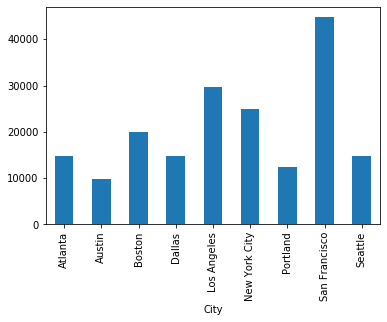

In [19]:
#which city has the max order?
all_data.groupby('City')['Quantity Ordered'].count().plot.bar()

In [20]:
all_data.groupby('City')['City'].count()

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

In [21]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode
0,176558.0,USB-C Charging Cable,2.0,11.95,8:46,4/19/2019,917 1st St,Dallas,TX,75001
2,176559.0,Bose SoundSport Headphones,1.0,99.99,22:30,4/7/2019,682 Chestnut St,Boston,MA,02215
3,176560.0,Google Phone,1.0,600.00,14:38,4/12/2019,669 Spruce St,Los Angeles,CA,90001
4,176560.0,Wired Headphones,1.0,11.99,14:38,4/12/2019,669 Spruce St,Los Angeles,CA,90001
5,176561.0,Wired Headphones,1.0,11.99,9:27,4/30/2019,333 8th St,Los Angeles,CA,90001
6,176562.0,USB-C Charging Cable,1.0,11.95,13:03,4/29/2019,381 Wilson St,San Francisco,CA,94016
7,176563.0,Bose SoundSport Headphones,1.0,99.99,7:46,4/2/2019,668 Center St,Seattle,WA,98101
8,176564.0,USB-C Charging Cable,1.0,11.95,10:58,4/12/2019,790 Ridge St,Atlanta,GA,30301
9,176565.0,Macbook Pro Laptop,1.0,1700.00,10:38,4/24/2019,915 Willow St,San Francisco,CA,94016
10,176566.0,Wired Headphones,1.0,11.99,14:05,4/8/2019,83 7th St,Boston,MA,02215


In [22]:
all_data['order Time']=pd.to_datetime(all_data['order Time'], format=('%H:%M'))
all_data['Order_Date']=pd.to_datetime(all_data['Order_Date'], format='%m/%d/%Y')

# Best Month of sales 

In [23]:
# split the Month from the order Date 
all_data['Month']=all_data['Order_Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,1900-01-01 08:46:00,2019-04-19,917 1st St,Dallas,TX,75001,4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 22:30:00,2019-04-07,682 Chestnut St,Boston,MA,02215,4
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4
4,176560.0,Wired Headphones,1.0,11.99,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4
5,176561.0,Wired Headphones,1.0,11.99,1900-01-01 09:27:00,2019-04-30,333 8th St,Los Angeles,CA,90001,4


In [24]:
# Calculate the sale 
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,1900-01-01 08:46:00,2019-04-19,917 1st St,Dallas,TX,75001,4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 22:30:00,2019-04-07,682 Chestnut St,Boston,MA,02215,4,99.99
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,600.00
4,176560.0,Wired Headphones,1.0,11.99,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,11.99
5,176561.0,Wired Headphones,1.0,11.99,1900-01-01 09:27:00,2019-04-30,333 8th St,Los Angeles,CA,90001,4,11.99


In [25]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

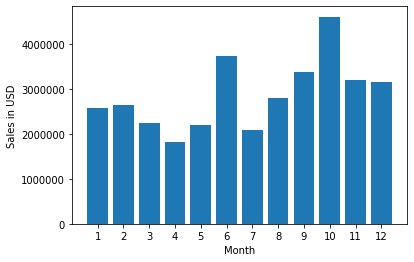

In [26]:
plt.bar(all_data['Month'].unique(), all_data.groupby('Month')['Sales'].sum())
plt.xticks(all_data['Month'].unique())
plt.xlabel('Month')
plt.ylabel('Sales in USD')

# Best Time of sales

In [27]:
# split the time  from the order Time 
all_data['Hour']=all_data['order Time'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month,Sales,Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,1900-01-01 08:46:00,2019-04-19,917 1st St,Dallas,TX,75001,4,23.90,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 22:30:00,2019-04-07,682 Chestnut St,Boston,MA,02215,4,99.99,22
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,600.00,14
4,176560.0,Wired Headphones,1.0,11.99,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,11.99,14
5,176561.0,Wired Headphones,1.0,11.99,1900-01-01 09:27:00,2019-04-30,333 8th St,Los Angeles,CA,90001,4,11.99,9


In [28]:
keys=[]
hour=[]
for key, hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

Text(0, 0.5, 'Sales in USD')

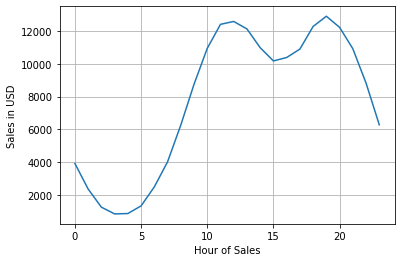

In [29]:
plt.plot(keys, hour)
plt.grid()
plt.xlabel('Hour of Sales')
plt.ylabel('Sales in USD')

# What product sold the most and why?

In [30]:
all_data.groupby('Product')['Sales'].sum()

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in USD')

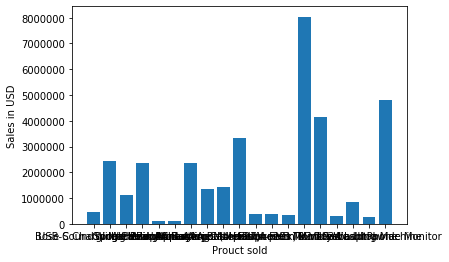

In [31]:
plt.bar(all_data['Product'].unique(), all_data.groupby('Product')['Sales'].sum())
plt.xticks(all_data['Product'].unique())
plt.xlabel('Prouct sold')
plt.ylabel('Sales in USD')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xticklabels'

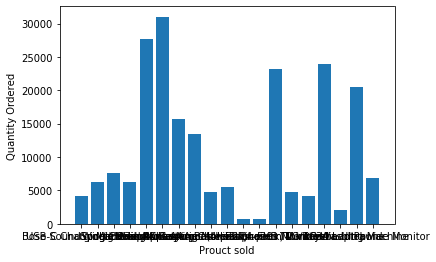

In [32]:
plt.bar(all_data['Product'].unique(), all_data.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(all_data['Product'].unique())
plt.xlabel('Prouct sold')
plt.ylabel('Quantity Ordered')
plt.xticklabels(all_data['Product'].unique(), rotation='vertical', size=8)

In [39]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()


[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

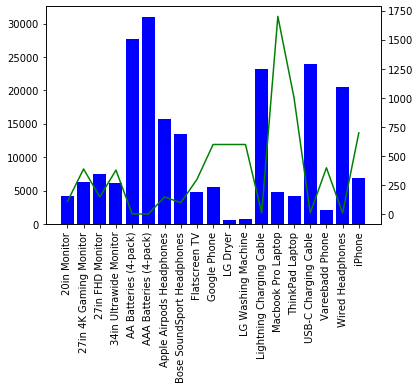

In [40]:
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='b')
ax2.plot(products, prices, color='g')
ax1.set_xticklabels(products, rotation='vertical', size=10)

# What products are most ofen sold together

In [33]:
df=all_data['Order ID'].duplicated(keep=False)
df2=all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month,Sales,Hour
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,600.00,14
4,176560.0,Wired Headphones,1.0,11.99,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,11.99,14
18,176574.0,Google Phone,1.0,600.00,1900-01-01 19:42:00,2019-04-03,20 Hill St,Los Angeles,CA,90001,4,600.00,19
19,176574.0,USB-C Charging Cable,1.0,11.95,1900-01-01 19:42:00,2019-04-03,20 Hill St,Los Angeles,CA,90001,4,11.95,19
30,176585.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 11:31:00,2019-04-07,823 Highland St,Boston,MA,02215,4,99.99,11


In [34]:
df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month,Sales,Hour,Grouped
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,600.00,14,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1.0,11.99,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,11.99,14,"Google Phone,Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,1900-01-01 19:42:00,2019-04-03,20 Hill St,Los Angeles,CA,90001,4,600.00,19,"Google Phone,USB-C Charging Cable"
19,176574.0,USB-C Charging Cable,1.0,11.95,1900-01-01 19:42:00,2019-04-03,20 Hill St,Los Angeles,CA,90001,4,11.95,19,"Google Phone,USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 11:31:00,2019-04-07,823 Highland St,Boston,MA,02215,4,99.99,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [36]:
df2=df2.drop_duplicates(subset=['Order ID'])
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,order Time,Order_Date,street Address,City,State,Zipcode,Month,Sales,Hour,Grouped
3,176560.0,Google Phone,1.0,600.00,1900-01-01 14:38:00,2019-04-12,669 Spruce St,Los Angeles,CA,90001,4,600.00,14,"Google Phone,Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,1900-01-01 19:42:00,2019-04-03,20 Hill St,Los Angeles,CA,90001,4,600.00,19,"Google Phone,USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,1900-01-01 11:31:00,2019-04-07,823 Highland St,Boston,MA,02215,4,99.99,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586.0,AAA Batteries (4-pack),2.0,2.99,1900-01-01 17:00:00,2019-04-10,365 Center St,San Francisco,CA,94016,4,5.98,17,"AAA Batteries (4-pack),Google Phone"
119,176672.0,Lightning Charging Cable,1.0,14.95,1900-01-01 11:07:00,2019-04-12,778 Maple St,New York City,NY,10001,4,14.95,11,"Lightning Charging Cable,USB-C Charging Cable"


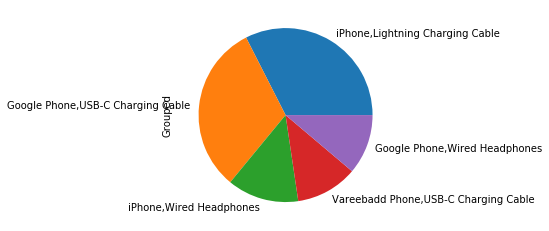

In [37]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [38]:
# the End of the Analyseis